# Montando o drive, importando bibliotecas e dados

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import pandas as pd
import seaborn as sns

In [83]:
dados = pd.read_csv('/content/drive/MyDrive/Alura/Python para Data Science/Seaborn/data/tips.csv', sep = ',')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Renomeando os Dados para Português

In [84]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [85]:
renomear = {
    'total_bill' : 'Valor_Total_da_Conta',
    'tip' : 'Gorjeta',
    'dessert' : 'Sobremesa',
    'day' : 'Dia_da_Semana',
    'time' : 'Hora_do_Dia',
    'size' : 'Total_de_Pessoas'
}

In [86]:
type(dados)

pandas.core.frame.DataFrame

In [87]:
gorjetas = dados.rename(columns = renomear)

In [88]:
gorjetas['Sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [89]:
gorjetas['Dia_da_Semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [90]:
gorjetas['Hora_do_Dia'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [91]:
tem_sobremesa = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

dias = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [92]:
gorjetas['Sobremesa'] = gorjetas['Sobremesa'].map(tem_sobremesa)
gorjetas['Dia_da_Semana'] = gorjetas['Dia_da_Semana'].map(dias)
gorjetas['Hora_do_Dia'] = gorjetas['Hora_do_Dia'].map(hora)

In [93]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Análise I

Valor da conta e gorjeta

In [94]:
gorjetas.columns

Index(['Valor_Total_da_Conta', 'Gorjeta', 'Sobremesa', 'Dia_da_Semana',
       'Hora_do_Dia', 'Total_de_Pessoas'],
      dtype='object')

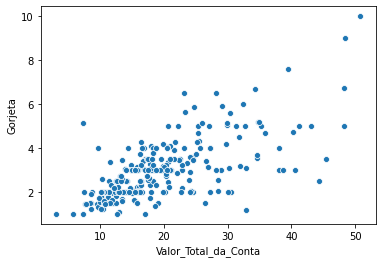

In [95]:
gorjeta_scatter = sns.scatterplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', data = gorjetas)

Visualmente o valor da gorjeta aumenta conforme o valor da conta 

In [96]:
print('A base de dados contém {} registros.\n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros.

Registros não nulos


Valor_Total_da_Conta    244
Gorjeta                 244
Sobremesa               244
Dia_da_Semana           244
Hora_do_Dia             244
Total_de_Pessoas        244
dtype: int64

## Criando o campo Porcentagem

In [97]:
gorjetas['Porcentagem'] = gorjetas['Gorjeta'] / gorjetas['Valor_Total_da_Conta']

In [98]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [99]:
gorjetas['Porcentagem'] = gorjetas['Porcentagem'].round(2)

In [100]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


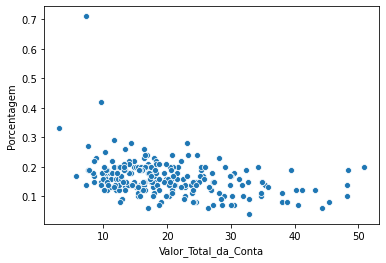

In [101]:
porcentagem_conta = sns.scatterplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', data = gorjetas)

Visualmente o valor da conta não é proporcional ao valor da gorjeta

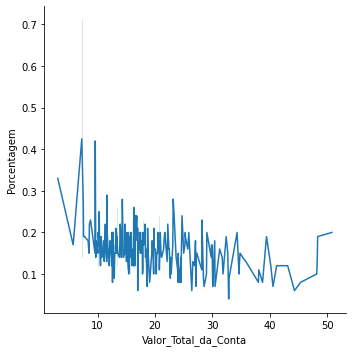

In [102]:
porcentagem_conta_linha = sns.relplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', kind = 'line', data = gorjetas)

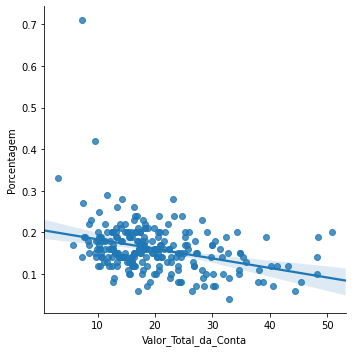

In [103]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', data = gorjetas)

# Análise II

Sobremesas

In [104]:
gorjetas[gorjetas['Sobremesa'] == 'Sim'].describe()

,Valor_Total_da_Conta,Gorjeta,Total_de_Pessoas,Porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [105]:
gorjetas[gorjetas['Sobremesa'] == 'Não'].describe()

,Valor_Total_da_Conta,Gorjeta,Total_de_Pessoas,Porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


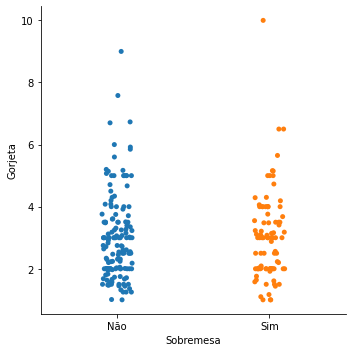

In [106]:
sns.catplot(x = 'Sobremesa', y = 'Gorjeta', data = gorjetas)

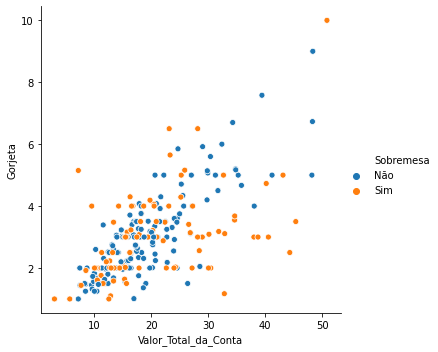

In [107]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', data = gorjetas)

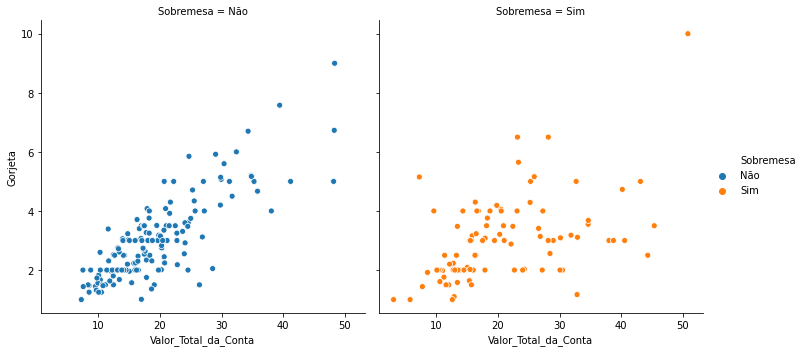

In [108]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', data = gorjetas)

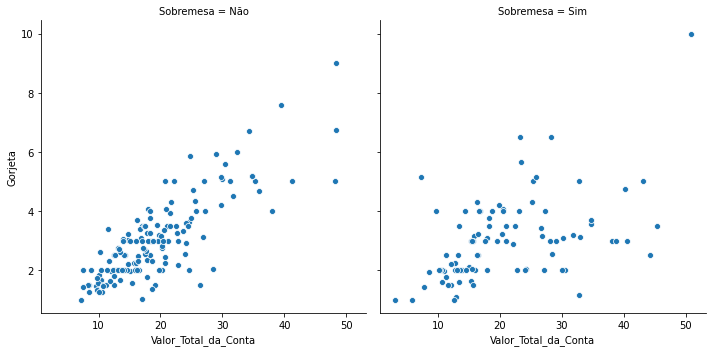

In [109]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', col = 'Sobremesa', data = gorjetas)

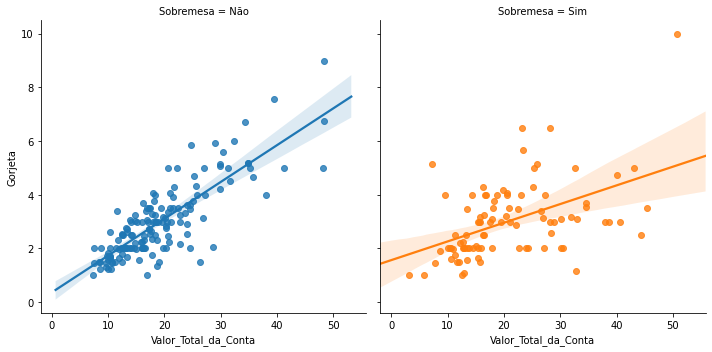

In [110]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', data = gorjetas)

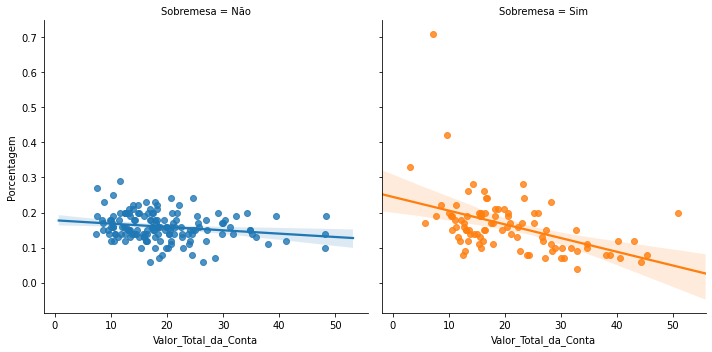

In [111]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', hue = 'Sobremesa', col = 'Sobremesa', data = gorjetas)

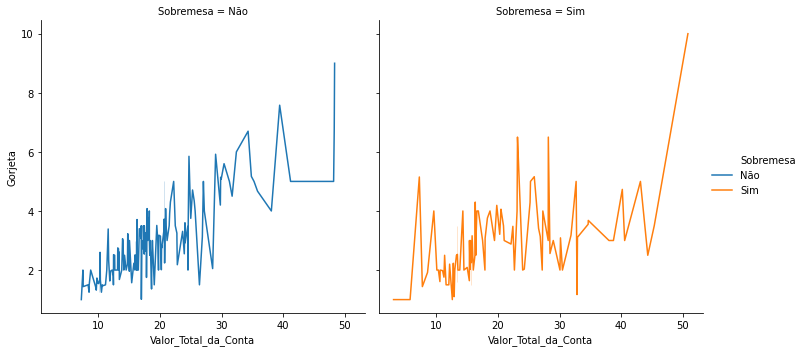

In [112]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', kind = 'line', data = gorjetas)

**Visualmente existe diferença entre aquele que pediram sobremesa e não pediram**

## Teste de Hipótese

**H<sup>null<sup>**
> **A distribuição da taxa de gorjeta é a mesma nos dois grupos**

**H<sup>alt<sup>**
> **A distribuição da taxa de gorjeta não é a mesma nos dois grupos**

In [113]:
from scipy.stats import ranksums

In [114]:
com_sobremesa = gorjetas.query("Sobremesa == 'Sim'")['Porcentagem']
sem_sobremesa = gorjetas.query("Sobremesa == 'Não'")['Porcentagem']

In [115]:
r = ranksums(com_sobremesa, sem_sobremesa)

In [116]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


p-value muito alto, logo a hipótese alternativa deve ser descartada.

"O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade."

**H<sup>null<sup>**
> **A distribuição da taxa de gorjeta é a mesma nos dois grupos**

In [117]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


# Análise III

In [118]:
gorjetas['Dia_da_Semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

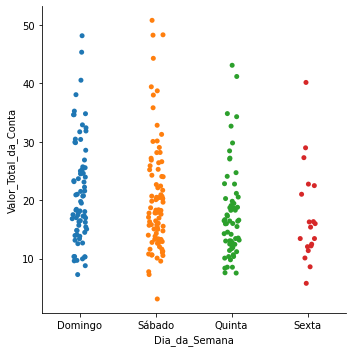

In [119]:
sns.catplot(x = 'Dia_da_Semana', y = 'Valor_Total_da_Conta', data = gorjetas)

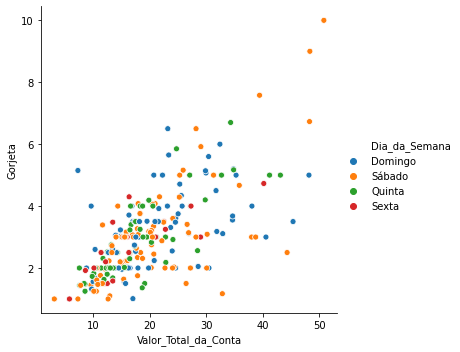

In [120]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Dia_da_Semana', data = gorjetas)

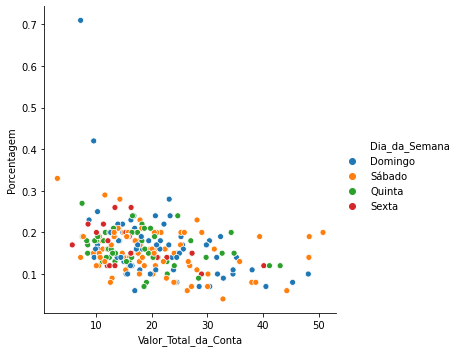

In [121]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', hue = 'Dia_da_Semana', data = gorjetas)

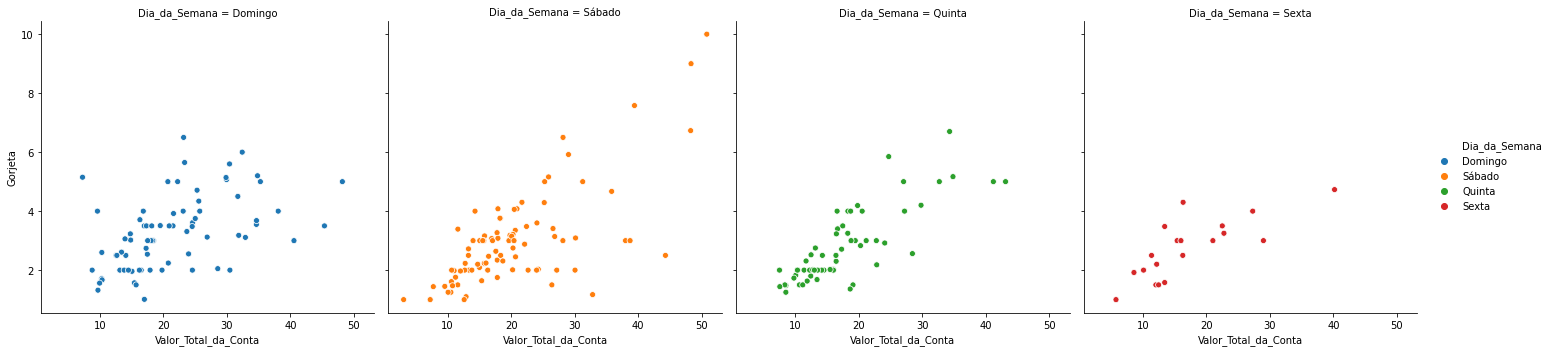

In [122]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Dia_da_Semana', col = 'Dia_da_Semana',data = gorjetas)

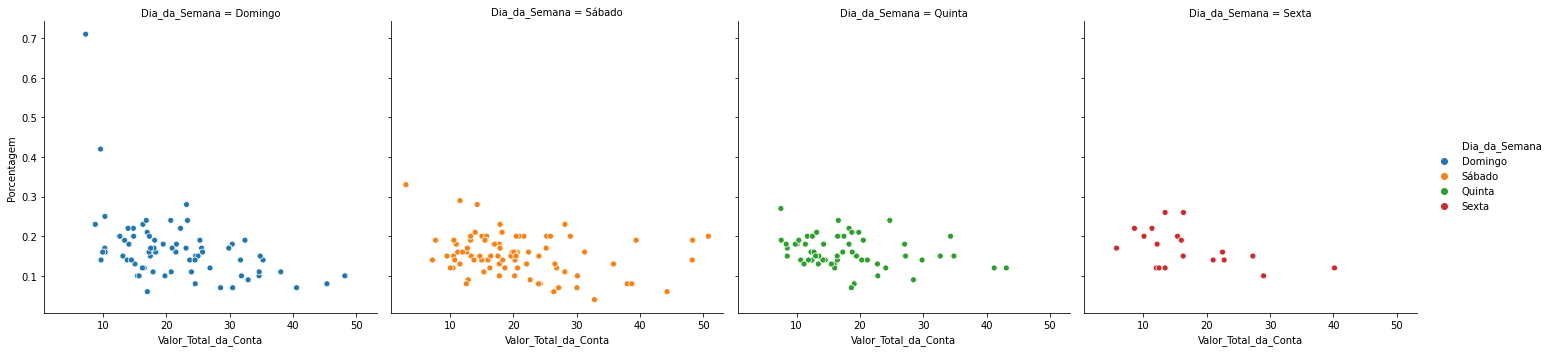

In [123]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', hue = 'Dia_da_Semana', col = 'Dia_da_Semana',data = gorjetas)

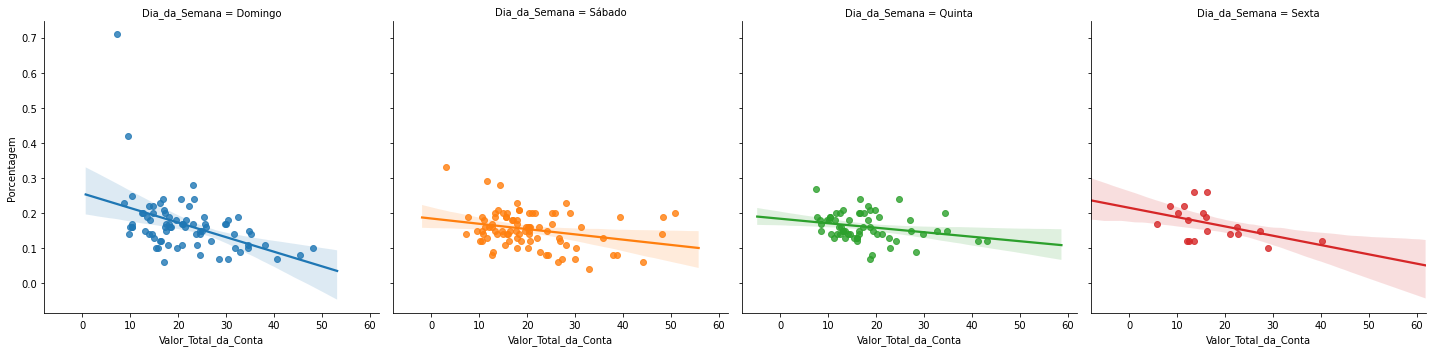

In [124]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', hue = 'Dia_da_Semana', col = 'Dia_da_Semana',data = gorjetas)

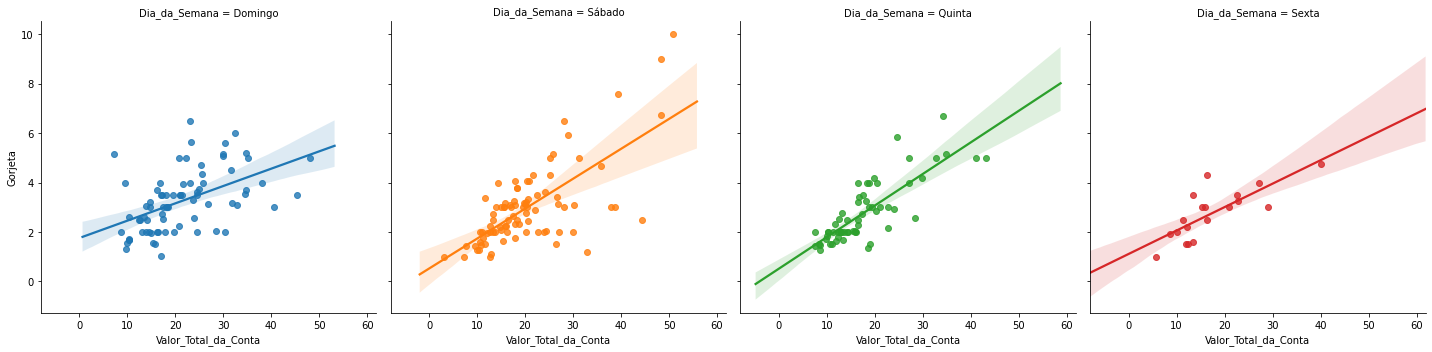

In [125]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Dia_da_Semana', col = 'Dia_da_Semana',data = gorjetas)

In [126]:
media_geral_gorjetas = gorjetas['Gorjeta'].mean()

In [127]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [128]:
gorjetas.groupby(['Dia_da_Semana']).mean()[['Valor_Total_da_Conta', 'Gorjeta', 'Porcentagem']]

,Valor_Total_da_Conta,Gorjeta,Porcentagem
Dia_da_Semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [129]:
print('Frequência dos dias')
gorjetas['Dia_da_Semana'].value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: Dia_da_Semana, dtype: int64

## Teste de Hipótese

**H<sup>null<sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt<sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [130]:
valor_conta_domingo = gorjetas.query("Dia_da_Semana == 'Domingo'")['Valor_Total_da_Conta']

In [131]:
valor_conta_sabado = gorjetas.query("Dia_da_Semana == 'Sábado'")['Valor_Total_da_Conta']

In [134]:
r2 = ranksums(valor_conta_sabado, valor_conta_domingo)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null<sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

In [135]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


# Análise IV

In [136]:
gorjetas['Hora_do_Dia'].unique()

array(['Jantar', 'Almoço'], dtype=object)

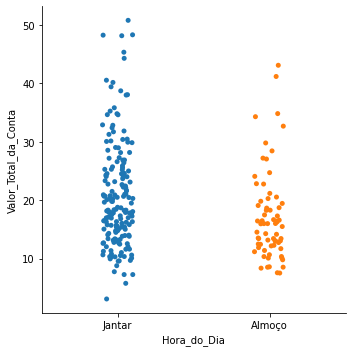

In [137]:
sns.catplot(x = 'Hora_do_Dia', y = 'Valor_Total_da_Conta', data = gorjetas)

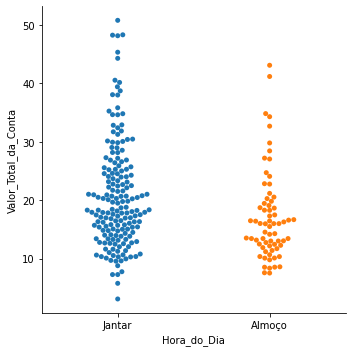

In [139]:
sns.catplot(x = 'Hora_do_Dia', y = 'Valor_Total_da_Conta', kind = 'swarm', data = gorjetas)

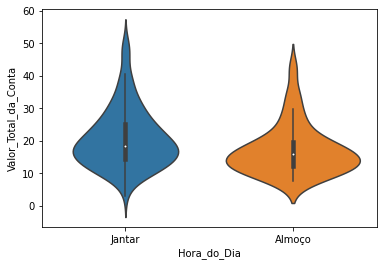

In [140]:
sns.violinplot(x = 'Hora_do_Dia', y = 'Valor_Total_da_Conta', data = gorjetas)

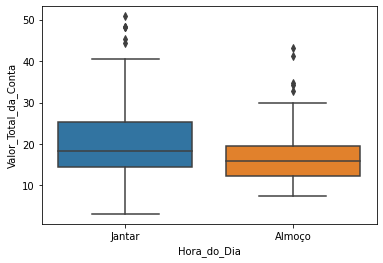

In [141]:
sns.boxplot(x = 'Hora_do_Dia', y = 'Valor_Total_da_Conta', data = gorjetas)

In [144]:
almoco = gorjetas.query("Hora_do_Dia == 'Almoço'")['Valor_Total_da_Conta']

In [145]:
jantar = gorjetas.query("Hora_do_Dia == 'Jantar'")['Valor_Total_da_Conta']

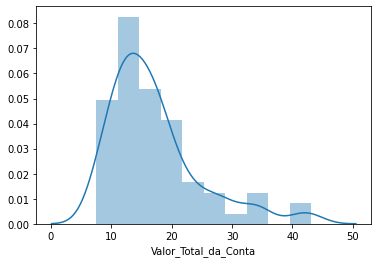

In [147]:
sns.distplot(almoco)

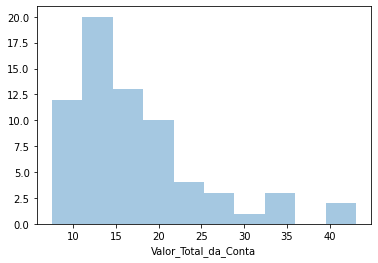

In [150]:
sns.distplot(almoco, kde = False)

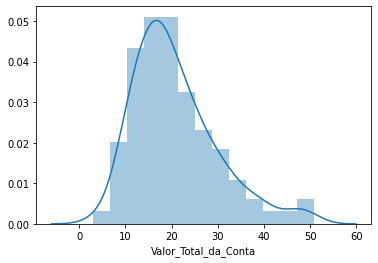

In [151]:
sns.distplot(jantar)

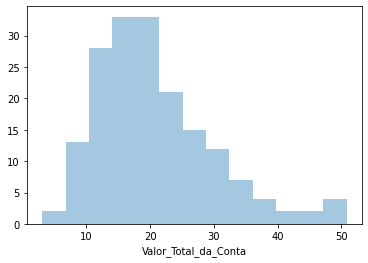

In [152]:
sns.distplot(jantar, kde = False)

## Teste de Hipótese

**H<sup>null<sup>**
> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt<sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [154]:
gorjetas.groupby(['Hora_do_Dia']).mean()[['Valor_Total_da_Conta', 'Gorjeta', 'Porcentagem']]

,Valor_Total_da_Conta,Gorjeta,Porcentagem
Hora_do_Dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [156]:
r3 = ranksums(jantar, almoco)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt<sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de Hipótese

**H<sup>null<sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt<sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [157]:
porcentagem_almoco = gorjetas.query("Hora_do_Dia == 'Almoço'")['Porcentagem']

In [158]:
porcentagem_jantar = gorjetas.query("Hora_do_Dia == 'Jantar'")['Porcentagem']

In [160]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>alt<sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**